# __Feature Engineering__

## __Agenda__

In this lesson, we will cover the following concepts with the help of examples:
- Introduction
- Feature Engineering Methods
- Transforming Variables
  * Log Transformation
  * Square Root Transformation
  * Box-Cox Transformation
- Features Scaling
- Label Encoding
- One Hot Encoding
- Hashing
- Grouping Operations

## __1. Introduction__
It refers to the process of selecting, modifying, or creating new features (variables) from the raw data to improve the performance of machine learning models. 
- It involves transforming the data into a more suitable format, making it easier for models to learn patterns and make accurate predictions. 
- It is a critical step in the data preprocessing pipeline and plays a key role in the success of machine learning projects. 

![image.png](attachment:0a9cfd6d-8646-42b2-a548-709ff9d38840.png)

## __2. Feature Engineering Methods__

They introduce the concept of creating new features through mathematical operations, transformations, or combining existing variables.

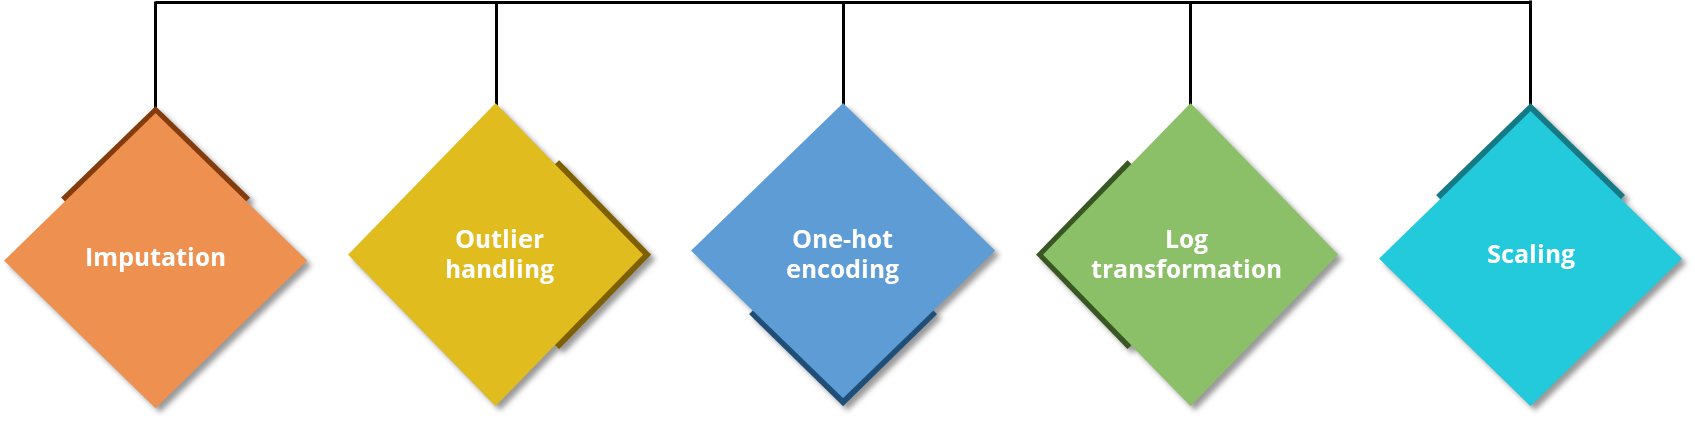

__Note:__ The __Data Wrangling__ lesson extensively addresses various feature engineering methods, including outlier handling, imputation, and data cleaning. Any aspects not covered in that lesson but deemed essential for feature engineering are comprehensively discussed here.

In [60]:
import pandas as pd
import numpy as np
df= pd.read_csv("HousePrices.csv")
# Example: Creating a new feature 'total_rooms' by adding bedrooms and bathrooms
df['total_rooms'] = df['bedrooms'] + df['bathrooms']

## __3. Transforming Variables__
Transforming variables is a crucial aspect of feature engineering that involves modifying the scale, distribution, or nature of variables to meet certain assumptions or to make them more suitable for analysis or modeling. 
- Here are common techniques for transforming variables:.


### __3.1 Log Transformation__

Log transformation is useful for handling skewed data or reducing the impact of outliers. It applies the natural logarithm to the variable values.

In [50]:
# Logarithmic transformation of the 'price' column
df['log_price'] = np.log(df['price'])

/usr/local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


### __3.2 Square Root Transformation__
Similar to log transformation, square root transformation is effective for stabilizing variance and handling skewed distributions.

In [51]:
# Square root transforming the 'price' variable
df['SquareRoot_price'] = np.sqrt(df['price'])

# Displaying the DataFrame with the new feature
print("DataFrame with square root transformed 'price':")
print(df[['price', 'SquareRoot_price']])

DataFrame with square root transformed 'price':
             price  SquareRoot_price
0     3.130000e+05        559.464029
1     2.384000e+06       1544.020725
2     3.420000e+05        584.807661
3     4.200000e+05        648.074070
4     5.500000e+05        741.619849
...            ...               ...
4595  3.081667e+05        555.127613
4596  5.343333e+05        730.981076
4597  4.169042e+05        645.681165
4598  2.034000e+05        450.998891
4599  2.206000e+05        469.680743

[4600 rows x 2 columns]


### __3.3 Box-Cox Transformation__

Box-cox transformation is a family of power transformations that includes both log and square root transformations. 
- It can handle a broader range of data distributions.

In [52]:
from scipy.stats import boxcox

# Applying Box-Cox transformation to 'sales' variable
df['BoxCox_Price'], _ = boxcox(df['sqft_living'])

# Displaying the DataFrame with the Box-Cox transformed 'sales' variable
print("DataFrame with box-cox transformed price:")
print(df[['sqft_living', 'BoxCox_Price']])

DataFrame with box-cox transformed price:
      sqft_living  BoxCox_Price
0            1340      8.270696
1            3650      9.609817
2            1930      8.752434
3            2000      8.799831
4            1940      8.759306
...           ...           ...
4595         1510      8.427673
4596         1460      8.383346
4597         3010      9.348243
4598         2090      8.858477
4599         1490      8.410114

[4600 rows x 2 columns]


## __4. Feature Scaling__
Feature scaling is a technique used in machine learning and data preprocessing to standardize or normalize the range of independent variables or features of a dataset. 

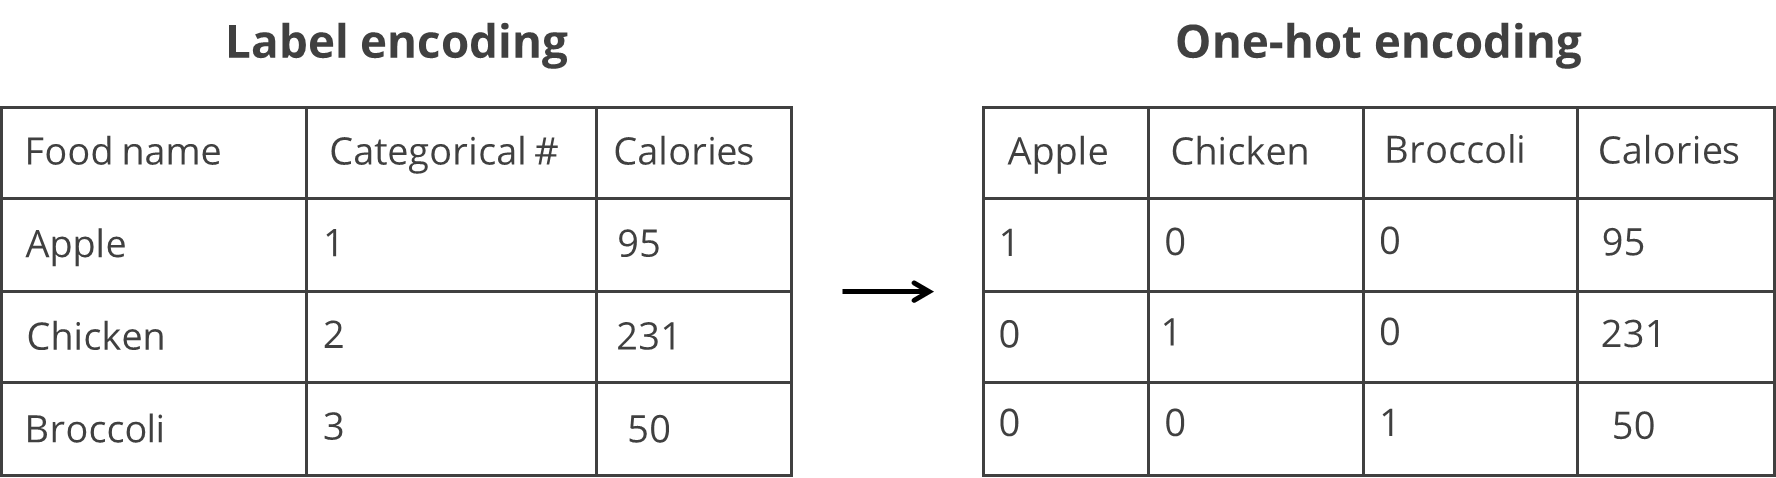

In [68]:
from sklearn.preprocessing import MinMaxScaler

# Scaling numeric features using min-max scaling
scaler = MinMaxScaler()
df[['sqft_living', 'sqft_lot']] = scaler.fit_transform(df[['sqft_living', 'sqft_lot']])
print(df)

                     date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50     0.073652   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50     0.249051   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00     0.118451   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25     0.123766   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50     0.119210   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75     0.086560   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50     0.082764   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50     0.200456   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00     0.130600   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50     0.085042   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0     0.

## __5. Label Encoding__

Label encoding is a technique used to convert categorical labels into a numeric format, making it suitable for machine learning algorithms that require numerical input. 
- In label encoding, each unique category is assigned an integer value. 
- This is particularly useful when dealing with ordinal categorical data, where the order of categories matters.

In [54]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample DataFrame
data = {'size': ['small', 'medium', 'large', 'medium', 'small']}
df = pd.DataFrame(data)

# Before label encoding
print("Original DataFrame:")
print(df)

# Apply label encoding
label_encoder = LabelEncoder()
df['size_encoded'] = label_encoder.fit_transform(df['size'])

# After label encoding
print("\nDataFrame after label encoding:")
print(df)

Original DataFrame:
     size
0   small
1  medium
2   large
3  medium
4   small

DataFrame after label encoding:
     size  size_encoded
0   small             2
1  medium             1
2   large             0
3  medium             1
4   small             2


In [57]:
# Demonstrating label encoding using csv file
from sklearn.preprocessing import LabelEncoder

# Label encoding for the 'city' column
label_encoder = LabelEncoder()
df['city_encoded'] = label_encoder.fit_transform(df['city'])
print(df)

                     date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0       

## __6. One-Hot Encoding__

One-hot encoding is a technique used to represent categorical variables as binary vectors. 
- It is particularly useful when dealing with nominal categorical data, where there is no inherent order among categories. 
- In one-hot encoding, each unique category is transformed into a binary column, and only one column in each set of binary columns is _hot_ (or 1) to indicate the presence of that category.

In [69]:
import pandas as pd

# Sample DataFrame
data = {'color': ['red', 'blue', 'green', 'red', 'green']}
df = pd.DataFrame(data)

# Before one-hot encoding
print("Original DataFrame:")
print(df)

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=['color'], prefix='color')

# After one-hot encoding
print("\nDataFrame after one-hot encoding:")
print(df_encoded)

Original DataFrame:
   color
0    red
1   blue
2  green
3    red
4  green

DataFrame after one-hot encoding:
   color_blue  color_green  color_red
0           0            0          1
1           1            0          0
2           0            1          0
3           0            0          1
4           0            1          0


In [62]:
# Demonstrating one-hot encoding using csv file
# One-Hot Encoding for the 'view' column
df_encode = pd.get_dummies(df, columns=['price'], prefix='price')

# After one-hot encoding
print("\nDataFrame after one-hot encoding:")
print(df_encode)


DataFrame after one-hot encoding:
                     date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     2014-05-02 00:00:00       3.0       1.50         1340      7912     1.5   
1     2014-05-02 00:00:00       5.0       2.50         3650      9050     2.0   
2     2014-05-02 00:00:00       3.0       2.00         1930     11947     1.0   
3     2014-05-02 00:00:00       3.0       2.25         2000      8030     1.0   
4     2014-05-02 00:00:00       4.0       2.50         1940     10500     1.0   
...                   ...       ...        ...          ...       ...     ...   
4595  2014-07-09 00:00:00       3.0       1.75         1510      6360     1.0   
4596  2014-07-09 00:00:00       3.0       2.50         1460      7573     2.0   
4597  2014-07-09 00:00:00       3.0       2.50         3010      7014     2.0   
4598  2014-07-10 00:00:00       4.0       2.00         2090      6630     1.0   
4599  2014-07-10 00:00:00       3.0       2.50         1490      8102     

## __7. Hashing__

It is a technique used to convert input data (of variable length) into a fixed-length string of characters, typically a hash code. 
- The hash function takes an input (or message) and returns a fixed-size string of characters, which is typically a hexadecimal number.
- It is commonly used for indexing data structures, checking data integrity, and hashing passwords.


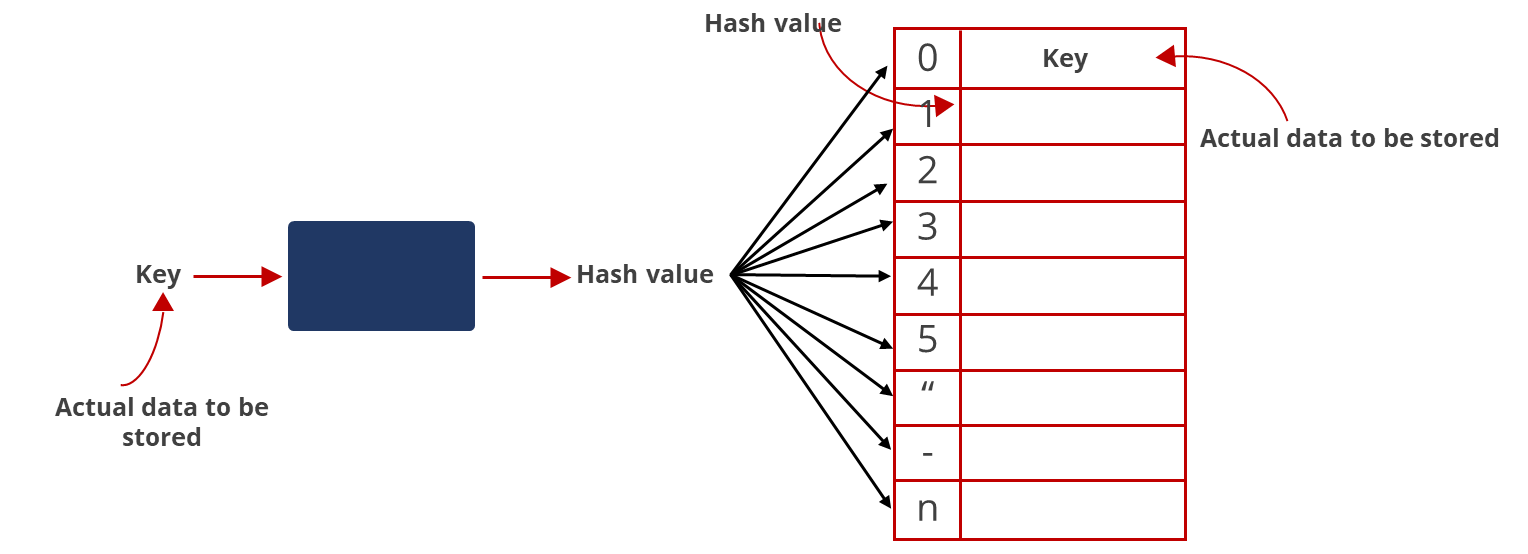

In [70]:
# Example of hashing in Python
data = "Hello, Hashing!"

# Using the hash() function
hash_value = hash(data)

print(f"Original data: {data}")
print(f"Hash value: {hash_value}")

Original data: Hello, Hashing!
Hash value: 780980211289661945


In [66]:
# Demonstrating hashing using csv file
# Hashing for the 'street' column
df['street_hashed'] = df['street'].apply(hash)
print(df)

                     date         price  bedrooms  bathrooms  sqft_living  \
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340   
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view  condition  sqft_above  \
0       

## __8. Grouping Operations__

Grouping operations involve splitting a dataset into groups based on some criteria, applying a function to each group independently, and then combining the results. 
- This is a crucial step in data analysis and manipulation, allowing for insights into the data at a more granular level.
- Grouping operations are commonly used in combination with aggregate functions to summarize data within each group.


In [ ]:
import pandas as pd

# Sample DataFrame
data = {'Category': ['Electronics', 'Clothing', 'Electronics', 'Clothing', 'Electronics'],
        'Revenue': [500, 300, 700, 400, 600]}

df = pd.DataFrame(data)

# Grouping by 'Category' and calculating total revenue for each category
grouped_df = df.groupby('Category')['Revenue'].sum().reset_index()

print("Original DataFrame:")
print(df)
print("\nGrouped DataFrame with total revenue:")
print(grouped_df)

In [67]:
# Grouping by 'city' and calculating the average price
df_grouped = df.groupby('city')['price'].mean().reset_index()
print(df_grouped)

                   city         price
0                Algona  2.072880e+05
1                Auburn  2.993404e+05
2    Beaux Arts Village  7.450000e+05
3              Bellevue  8.471807e+05
4         Black Diamond  3.396056e+05
5               Bothell  4.814419e+05
6                Burien  3.489472e+05
7             Carnation  5.087520e+05
8            Clyde Hill  1.321945e+06
9             Covington  2.962304e+05
10           Des Moines  3.049925e+05
11               Duvall  4.039941e+05
12             Enumclaw  3.076146e+05
13            Fall City  6.926818e+05
14          Federal Way  2.898877e+05
15  Inglewood-Finn Hill  4.250000e+05
16             Issaquah  5.961637e+05
17              Kenmore  4.474940e+05
18                 Kent  4.394924e+05
19             Kirkland  6.515836e+05
20     Lake Forest Park  4.484750e+05
21         Maple Valley  3.364749e+05
22               Medina  2.046559e+06
23        Mercer Island  1.123818e+06
24               Milton  2.850000e+05
25          

# __Assisted Practice__

## __Problem Statement:__
A botanical research team is conducting a comprehensive analysis of iris flowers, aiming to derive valuable insights from their characteristics. The team wants to explore feature engineering techniques to better understand and visualize the relationships within the Iris dataset.

## __Steps to Perform:__
- Understand the Dataset: Get familiar with the Iris dataset and its features
- Engineer Features: Create new features like sepal area and petal area
- Transform Variables: If the features are not normally distributed, apply transformations
- Scale Features: Use Min-Max Scaling or standard scaling to scale the features
- Encode Labels: Convert the categorical data (species) into numerical data using label encoding
- One Hot Encoding: Apply one hot encoding on the species feature and compare with label encoding